## Installing and importing packages

In [1]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns, matplotlib.pyplot as plt
import pandas_profiling

<ipython-input-2-0c72ed7407f9>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


## Data Collection

In [3]:
# Reading Train datasets
train = pd.read_csv("Train-Set.csv")
train.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Reading Test datasets
test = pd.read_csv("Test-Set.csv")
test.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Columns in the datasets 
print('Columns in Train set', train.columns)
print('Columns in Test set', test.columns)

Columns in Train set Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')
Columns in Test set Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')


In [6]:
# shape of datasets
print('Shape of Train set', train.shape)
print('Shape of Test set', test.shape)

Shape of Train set (8523, 12)
Shape of Test set (5681, 11)


In [7]:
# Different data types in the datasets
print('Description of Train set \n ')
train.info()

Description of Train set 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
print('Description of Train set \n')
test.info()


Description of Train set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


## Data Preprocessing

### 1.	When preprocessing the data, be sure to handle any inconsistencies or outliers in addition to missing values. Consider encoding categorical variables and standardizing or normalizing numerical features if necessary.

#### Handling Missing Values

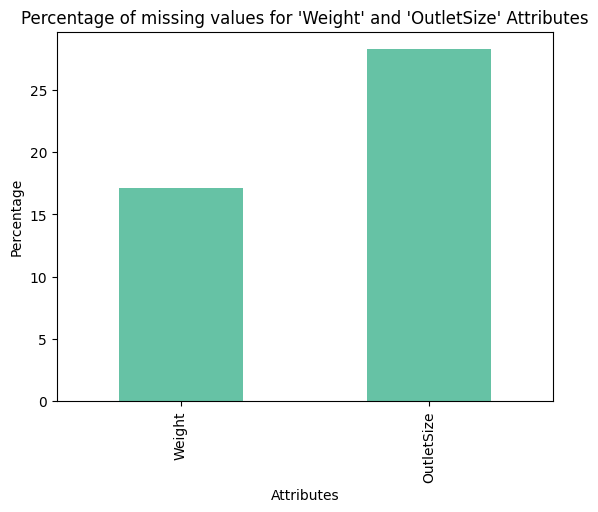

In [9]:
# There are some missing values in the train and test datasets. Attributes with missing data are- 'Weight' and 'OutlestSize'
# Weight is float datatype and OutletSize is of object datatype
Missing_data = train[['Weight', "OutletSize"]]

# Missing values can be ignored or filled with mean/mode values to neutralize the size of all attributes in the dataset. So, checking on percentage of missing values
missing_percentage = Missing_data.isnull().sum() / len(Missing_data) * 100

missing_percentage.plot(kind='bar', x='Column', y='Percentage', colormap='Set2')
plt.xlabel("Attributes")
plt.ylabel("Percentage")
plt.title("Percentage of missing values for 'Weight' and 'OutletSize' Attributes")

plt.show()

In [10]:
train_sorted = train.sort_values(by=['ProductID'])
train_sorted.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8195,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040


In [11]:
train_sorted.tail(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
2084,NCZ53,NaN,Low Fat,0.024359,Health and Hygiene,190.4214,OUT027,1985,Medium,Tier 3,Supermarket Type3,5652.6420
1267,NCZ53,9.60,Low Fat,0.024577,Health and Hygiene,186.6214,OUT018,2009,Medium,Tier 3,Supermarket Type2,1884.2140
3959,NCZ53,9.60,Low Fat,0.024457,Health and Hygiene,186.6214,OUT013,1987,High,Tier 3,Supermarket Type1,3203.1638
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832


In [12]:
test_sorted = test.sort_values(by=['ProductID'])
test_sorted.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
5081,DRA12,11.60,LF,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1
500,DRA12,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1
3912,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3
2847,DRA24,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,2009,Medium,Tier 3,Supermarket Type2
4538,DRA24,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1
1211,DRA24,19.35,Regular,0.040009,Soft Drinks,163.2868,OUT045,2002,NaN,Tier 2,Supermarket Type1
3666,DRA59,8.27,Regular,0.128187,Soft Drinks,184.3924,OUT045,2002,NaN,Tier 2,Supermarket Type1
4334,DRA59,8.27,reg,0.127904,Soft Drinks,183.9924,OUT035,2004,Small,Tier 2,Supermarket Type1
104,DRB01,NaN,low fat,0.143991,Soft Drinks,191.5530,OUT019,1985,Small,Tier 1,Grocery Store
5063,DRB01,7.39,Low Fat,0.000000,Soft Drinks,191.7530,OUT035,2004,Small,Tier 2,Supermarket Type1


In [13]:
test_sorted.tail(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
2534,NCZ42,NaN,Low Fat,0.019764,Household,236.3248,OUT019,1985,Small,Tier 1,Grocery Store
4825,NCZ42,10.50,Low Fat,0.011334,Household,236.8248,OUT018,2009,Medium,Tier 3,Supermarket Type2
1119,NCZ42,10.50,LF,0.011311,Household,238.7248,OUT045,2002,NaN,Tier 2,Supermarket Type1
1241,NCZ53,9.60,Low Fat,0.024473,Health and Hygiene,187.2214,OUT035,2004,Small,Tier 2,Supermarket Type1
2875,NCZ53,9.60,Low Fat,0.024527,Health and Hygiene,188.5214,OUT045,2002,NaN,Tier 2,Supermarket Type1
2318,NCZ53,9.60,Low Fat,0.024616,Health and Hygiene,190.0214,OUT017,2007,NaN,Tier 2,Supermarket Type1
1730,NCZ53,9.60,Low Fat,0.024477,Health and Hygiene,189.6214,OUT046,1997,Small,Tier 1,Supermarket Type1
2907,NCZ54,14.65,Low Fat,0.083344,Household,163.6552,OUT035,2004,Small,Tier 2,Supermarket Type1
4307,NCZ54,14.65,Low Fat,0.083290,Household,160.4552,OUT013,1987,High,Tier 3,Supermarket Type1
4700,NCZ54,14.65,Low Fat,0.083831,Household,161.4552,OUT017,2007,NaN,Tier 2,Supermarket Type1


##### After, sorting the dataset by 'ProductID', we deduced the missing weight values by examining the weights of other products with the same ID in the weight column.

In [14]:
#Filling the missing weight values
train['Weight'] = train.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))
test['Weight'] = test.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-14-b95f4fbfdf78>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train['Weight'] = train.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))
<ipython-input-14-b95f4fbfdf78>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test['Weight'] = test.groupby('ProductID')[

In [15]:
train.isnull().sum()

ProductID               0
Weight                  4
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [16]:
test.isnull().sum()

ProductID               0
Weight                 20
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

##### By examining the values in  OutletID, OutletType and OutletSize columns and how they relate to each other, we can gain insights into how OutletSize should be filled in for the missing values.

In [17]:
outlet_unique_sizes_train = train.groupby('OutletID')['OutletSize'].unique()
outlet_unique_sizes_train

OutletID
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: OutletSize, dtype: object

In [18]:
outlet_unique_sizes_test = test.groupby('OutletID')['OutletSize'].unique()
outlet_unique_sizes_test

OutletID
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: OutletSize, dtype: object

In [19]:
outlettype_unique_sizes_train = train.groupby('OutletID')['OutletType'].unique()
outlettype_unique_sizes_train

OutletID
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: OutletType, dtype: object

In [20]:
outlettype_unique_sizes_test = test.groupby('OutletID')['OutletType'].unique()
outlettype_unique_sizes_test

OutletID
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: OutletType, dtype: object

In [21]:
outletsize_unique_sizes_train = train.groupby('OutletType')['OutletSize'].unique()
outletsize_unique_sizes_train

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [22]:
outletsize_unique_sizes_test = test.groupby('OutletType')['OutletSize'].unique()
outletsize_unique_sizes_test

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, nan, Small, High]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [23]:
# To fill the missing values in 'OutetSize' having'OutletType' --- 'Grocery Store', we can fill with 'Small' as it's has only one value 'Small'
train.loc[(train['OutletType'] == 'Grocery Store') & (train['OutletSize'].isna()), 'OutletSize'] = 'Small'
test.loc[(test['OutletType'] == 'Grocery Store') & (test['OutletSize'].isna()), 'OutletSize'] = 'Small'

In [24]:
# To fill the missing values in 'OutetSize' having 'OutletType' --- 'Supermarket Type1', we can fill with mode value
# With mode for OutletSize
train['OutletSize'].fillna(train['OutletSize'].mode()[0], inplace=True)
test['OutletSize'].fillna(test['OutletSize'].mode()[0], inplace=True)

In [25]:
train.isnull().sum()

ProductID            0
Weight               4
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [26]:
test.isnull().sum()

ProductID             0
Weight               20
FatContent            0
ProductVisibility     0
ProductType           0
MRP                   0
OutletID              0
EstablishmentYear     0
OutletSize            0
LocationType          0
OutletType            0
dtype: int64

In [27]:
# With mean for Weight
train['Weight'].fillna(train['Weight'].mean(), inplace=True)
test['Weight'].fillna(test['Weight'].mean(), inplace=True)

In [28]:
test.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [29]:
train.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [30]:
# Filling missing values

# With mean for Weight
# ------ train['Weight'].fillna(train['Weight'].mean(), inplace=True)
# With mode for OutletSize
# ----- train['OutletSize'].fillna(train['OutletSize'].mode()[0], inplace=True)

#### Handling outliers

In [31]:
# Finding the outliers in the train dataset

# Calculate the z-score for each column
z_scores = np.abs((train - train.mean()) / train.std())

# Identify potential outliers
outliers = (z_scores > 3).any(axis=1)

# Print the number of potential outliers
print("Number of potential outliers:", outliers.sum())

# Print the indices of potential outliers
print("Indices of potential outliers:", train[outliers].index)


Number of potential outliers: 185
Indices of potential outliers: Int64Index([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,
            ...
            7949, 8039, 8194, 8201, 8215, 8245, 8273, 8345, 8432, 8447],
           dtype='int64', length=185)


<ipython-input-31-e193350a3e2d>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((train - train.mean()) / train.std())
<ipython-input-31-e193350a3e2d>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((train - train.mean()) / train.std())


In [32]:
# Remove outliers as their quantity is very low when compared to whole dataset
train1 = train[~outliers]

# Print the number of removed outliers
print("Number of removed outliers:", outliers.sum())

# Print the number of remaining observations
print("Number of remaining observations:", len(train1))

Number of removed outliers: 185
Number of remaining observations: 8338


#### Handling data inconsistency

In [33]:
# Checking duplicate rows
print("Number of duplicates:", train.duplicated().sum())

Number of duplicates: 0


#### Visualzing the dataset

In [34]:
# Generate the report
train_vis = pd.read_csv('Train-Set.csv')
train_report = pandas_profiling.ProfileReport(train_vis)

# Save the report to an HTML file
train_report.to_file('Big_Mart_Sales_report_train.html')

# Display the report in the notebook
display(train_report)

Output hidden; open in https://colab.research.google.com to view.

In [35]:
# Generate the report
test_vis = pd.read_csv('Test-Set.csv')
test_report = pandas_profiling.ProfileReport(test_vis)

# Save the report to an HTML file
test_report.to_file('Big_Mart_Sales_report_test.html')

# Display the report in the notebook
display(test_report)

Output hidden; open in https://colab.research.google.com to view.

#### Standardizing the FatContent column

In [36]:
train['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [37]:
test['FatContent'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [38]:
train['FatContent'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['FatContent'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
train['FatContent']= train['FatContent'].astype(str)
test['FatContent']= test['FatContent'].astype(str)

In [39]:
train['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [40]:
test['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Applying Label and One-Hot Encoding to the attributes

In [41]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit and transform the categorical column
train['FatContent'] = le.fit_transform(train['FatContent'])
train['ProductType'] = le.fit_transform(train['ProductType'])
train['OutletSize'] = le.fit_transform(train['OutletSize'])
train['LocationType'] = le.fit_transform(train['LocationType'])
train['OutletType'] = le.fit_transform(train['OutletType'])
train['ProductType'] = le.fit_transform(train['OutletType'])

In [42]:
test['FatContent'] = le.fit_transform(test['FatContent'])
test['ProductType'] = le.fit_transform(test['ProductType'])
test['OutletSize'] = le.fit_transform(test['OutletSize'])
test['LocationType'] = le.fit_transform(test['LocationType'])
test['OutletType'] = le.fit_transform(test['OutletType'])
test['ProductType'] = le.fit_transform(test['OutletType'])

In [43]:
train.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,0,0.016047,1,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,2,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,1,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.000000,0,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.930,0,0.000000,1,53.8614,OUT013,1987,0,2,1,994.7052
5,FDP36,10.395,1,0.000000,2,51.4008,OUT018,2009,1,2,2,556.6088
6,FDO10,13.650,1,0.012741,1,57.6588,OUT013,1987,0,2,1,343.5528
7,FDP10,19.000,0,0.127470,3,107.7622,OUT027,1985,1,2,3,4022.7636
8,FDH17,16.200,1,0.016687,1,96.9726,OUT045,2002,2,1,1,1076.5986
9,FDU28,19.200,1,0.094450,1,187.8214,OUT017,2007,2,1,1,4710.5350


In [44]:
test.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,0,0.007565,1,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300,1,0.038428,1,87.3198,OUT017,2007,2,1,1
2,NCN55,14.600,0,0.099575,0,241.7538,OUT010,1998,2,2,0
3,FDQ58,7.315,0,0.015388,1,155.0340,OUT017,2007,2,1,1
4,FDY38,13.600,1,0.118599,3,234.2300,OUT027,1985,1,2,3
5,FDH56,9.800,1,0.063817,1,117.1492,OUT046,1997,2,0,1
6,FDL48,19.350,1,0.082602,2,50.1034,OUT018,2009,1,2,2
7,FDC48,9.195,0,0.015782,3,81.0592,OUT027,1985,1,2,3
8,FDN33,6.305,1,0.123365,1,95.7436,OUT045,2002,2,1,1
9,FDA36,5.985,0,0.005698,1,186.8924,OUT017,2007,2,1,1


## Preethi


In [45]:
# creating new column num_years
train['num_years'] = train['EstablishmentYear'].apply(lambda x: 2013 - x) 
test['num_years'] = test['EstablishmentYear'].apply(lambda x: 2013 - x) 

In [46]:
col = ['FatContent', 'ProductType', 'OutletSize', 'LocationType', 'OutletType']
# handling catagorical variables
train_datar = pd.get_dummies(train, columns = col, drop_first = True)
test_datar = pd.get_dummies(test, columns = col,drop_first = True)

In [47]:
X = train_datar.drop(['OutletSales'], axis=1)
y = train_datar['OutletSales']

In [48]:
X

,ProductID,Weight,ProductVisibility,MRP,OutletID,EstablishmentYear,num_years,FatContent_1,ProductType_1,ProductType_2,ProductType_3,OutletSize_1,OutletSize_2,LocationType_1,LocationType_2,OutletType_1,OutletType_2,OutletType_3
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,14,0,1,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,4,1,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,14,0,1,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.000000,182.0950,OUT010,1998,15,1,0,0,0,0,1,0,1,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987,26,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,26,0,1,0,0,0,0,0,1,1,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,11,1,1,0,0,0,1,1,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,9,0,1,0,0,0,1,1,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,4,1,0,1,0,1,0,0,1,0,1,0


In [49]:
# # Drop the ID and the target variable from the features dataframe
# X = train.drop(['OutletSales'], axis=1)
# y = train['OutletSales']

# Convert categorical variables into numerical variables
X1 = pd.get_dummies(X)

# Scale the input features
scaler = StandardScaler()
X2 = scaler.fit_transform(X1)

In [50]:
X1

,Weight,ProductVisibility,MRP,EstablishmentYear,num_years,FatContent_1,ProductType_1,ProductType_2,ProductType_3,OutletSize_1,...,OutletID_OUT010,OutletID_OUT013,OutletID_OUT017,OutletID_OUT018,OutletID_OUT019,OutletID_OUT027,OutletID_OUT035,OutletID_OUT045,OutletID_OUT046,OutletID_OUT049
0,9.300,0.016047,249.8092,1999,14,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,2009,4,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,1999,14,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.000000,182.0950,1998,15,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,26,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,26,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,2002,11,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,9,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,2009,4,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [51]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Create a linear regression estimator
estimator = LinearRegression()

# Create an RFE object with cross-validation and fit the data
selector = RFECV(estimator)


In [52]:
selector = selector.fit(X1, y)

# Print the selected features
selected_features = selector.support_
print(selected_features)


KeyboardInterrupt: ignored

In [ ]:
# Transform the data using the selected features
X_rfe = selector.transform(X1)

In [ ]:
# Encode categorical variables
le = LabelEncoder()
train_datar['FatContent'] = le.fit_transform(train_datar['FatContent'])
train_datar['ProductType'] = le.fit_transform(train_datar['ProductType'])
train_datar['LocationType'] = le.fit_transform(train_datar['LocationType'])
train_datar['OutletType'] = le.fit_transform(train_datar['OutletType'])
train_datar['OutletSize'] = le.fit_transform(train_datar['OutletSize'])
